In [115]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud, ImageColorGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tnews = fetch_20newsgroups(subset="train", remove=('headers', 'footers', 'quotes'))

In [65]:
print("keys: ", tnews.keys())
print("target_names: ", list(tnews.target_names))
print("target: ", list(tnews.target))
print("DESCR: ", list(tnews.DESCR))
print("DESCR shape: ", pd.DataFrame(list(tnews.DESCR)).shape)
print("Ex: ", tnews.data[1])

keys:  dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
target_names:  ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
target:  [7, 4, 4, 1, 14, 16, 13, 3, 2, 4, 8, 19, 4, 14, 6, 0, 1, 7, 12, 5, 0, 10, 6, 2, 4, 1, 12, 9, 15, 7, 6, 13, 12, 17, 18, 10, 8, 11, 8, 16, 9, 4, 3, 9, 9, 4, 4, 8, 12, 14, 5, 15, 2, 13, 17, 11, 7, 10, 2, 14, 12, 5, 4, 6, 7, 0, 11, 16, 0, 6, 17, 7, 12, 7, 3, 12, 11, 7, 2, 2, 0, 16, 1, 2, 7, 3, 2, 1, 10, 12, 12, 17, 12, 2, 8, 8, 18, 5, 0, 1, 6, 12, 8, 4, 17, 12, 12, 12, 1, 6, 18, 4, 3, 10, 9, 0, 13, 11, 5, 14, 15, 8, 4, 15, 15, 1, 0, 16, 9, 8, 6, 13, 6, 17, 14, 0, 9, 1, 2, 15, 13, 9, 2, 8, 2, 13, 2, 0, 15, 

$\textit{TFIDF}$

El tamaño del vocabulario es 150
(3, 150)


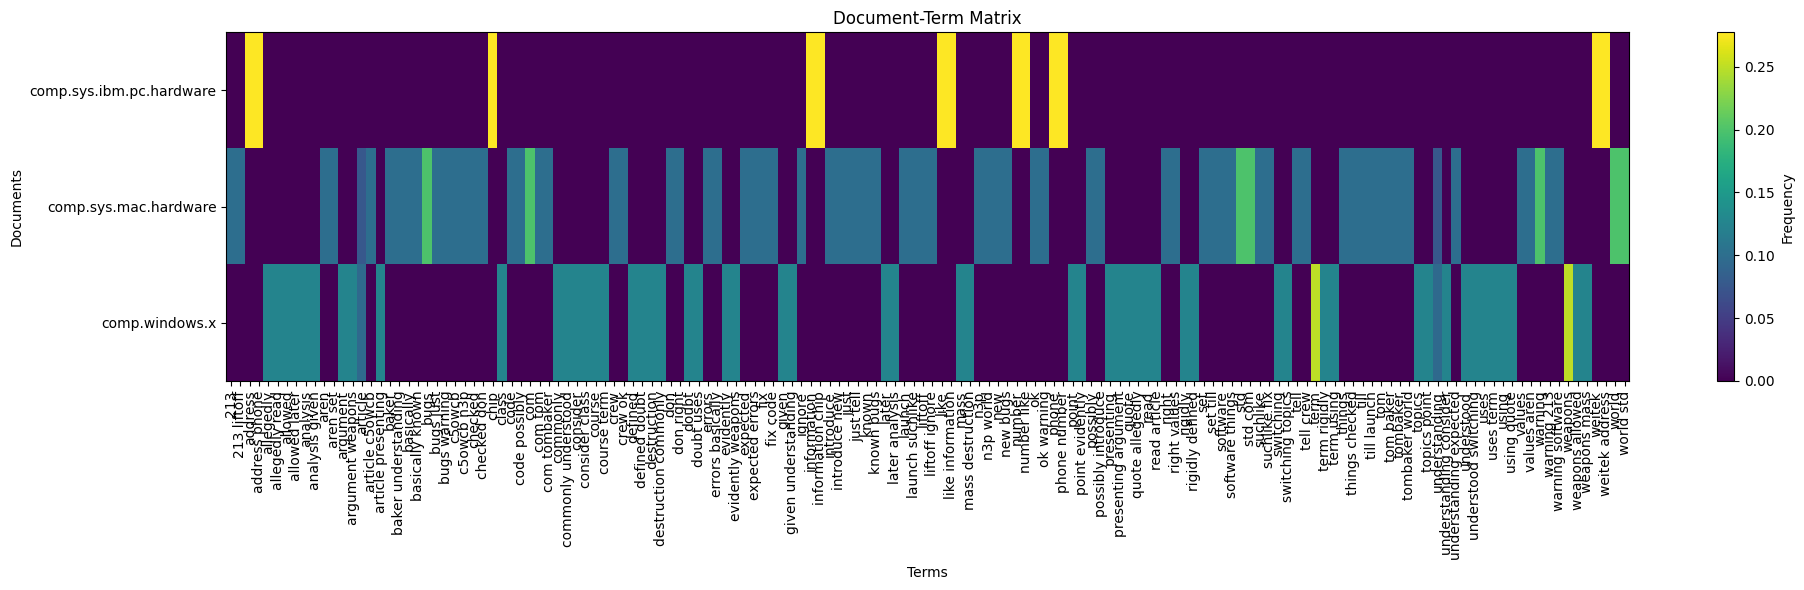

In [209]:
cv1 =TfidfVectorizer(ngram_range=(1,2), max_df=1.0, min_df=1, max_features=None, stop_words="english")
subset = tnews.data[3:6]
subsetNames = tnews.target_names[3:6]

vectors = cv1.fit_transform(subset)
vocabulary = cv1.get_feature_names_out()
matrix = vectors.toarray()
matrix = pd.DataFrame(matrix, columns=vocabulary, index=subsetNames)

print(f'El tamaño del vocabulario es {len(cv1.get_feature_names_out())}')
print(vectors.shape)

plt.figure(figsize=(20, 6))
plt.imshow(matrix, cmap='viridis', aspect='auto')
plt.title('Document-Term Matrix')
plt.xlabel('Terms')
plt.ylabel('Documents')
plt.xticks(range(len(vocabulary)), vocabulary, rotation=90)
plt.yticks(range(len(subsetNames)), subsetNames)  # Set document names on y-axis
plt.colorbar(label='Frequency')
plt.tight_layout()
plt.show()


$\textit{Count Vectorizer}$

El tamaño del vocabulario es 150
(3, 150)


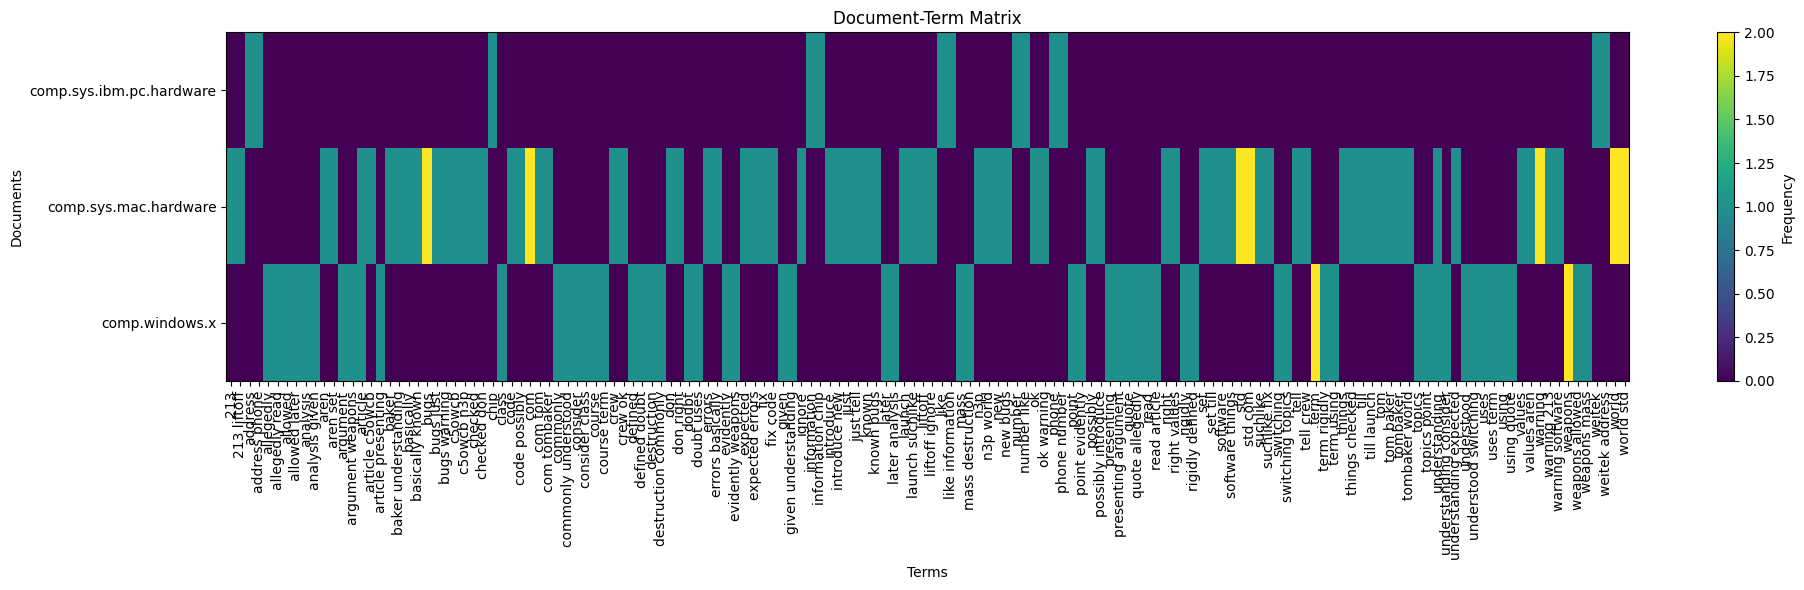

In [210]:
cv2 = CountVectorizer(ngram_range=(1,2), max_df=1.0, min_df=1, max_features=None, stop_words="english")
subset = tnews.data[3:6]
subsetNames = tnews.target_names[3:6]

vectors = cv2.fit_transform(subset)
vocabulary = cv2.get_feature_names_out()
matrix = vectors.toarray()
matrix = pd.DataFrame(matrix, columns=vocabulary, index=subsetNames)

print(f'El tamaño del vocabulario es {len(cv2.get_feature_names_out())}')
print(vectors.shape)

plt.figure(figsize =(20, 6))
plt.imshow(matrix, cmap='viridis', aspect='auto')
plt.title('Document-Term Matrix')
plt.xlabel('Terms')
plt.ylabel('Documents')
plt.xticks(range(len(vocabulary)), vocabulary, rotation=90)
plt.yticks(range(len(subsetNames)), subsetNames)  # Set document names on y-axis
plt.colorbar(label='Frequency')
plt.tight_layout()
plt.show()